In [575]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [576]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

PassengerId = test['PassengerId']

In [577]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explorando os dados

In [578]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [579]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


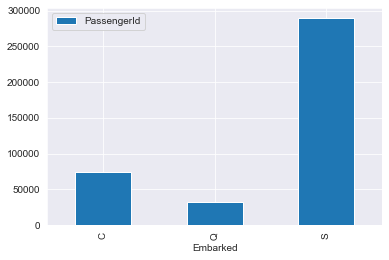

In [580]:
train[['PassengerId', 'Embarked']].groupby('Embarked').sum().plot(kind='bar')

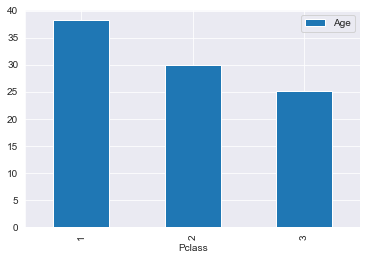

In [581]:
train[['Age', 'Pclass']].groupby('Pclass').mean().plot(kind='bar')

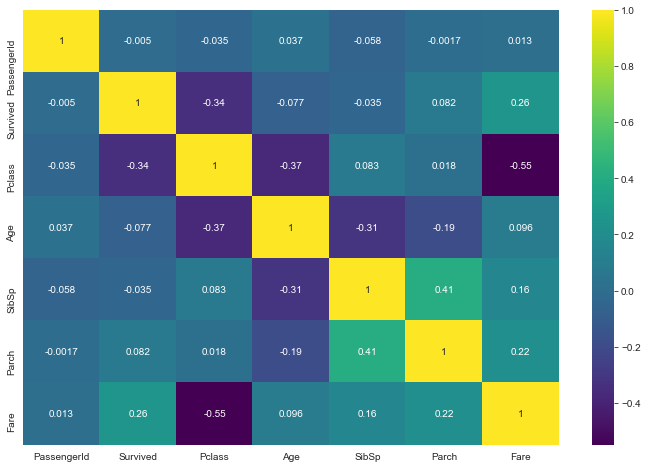

In [582]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap='viridis', annot=True)

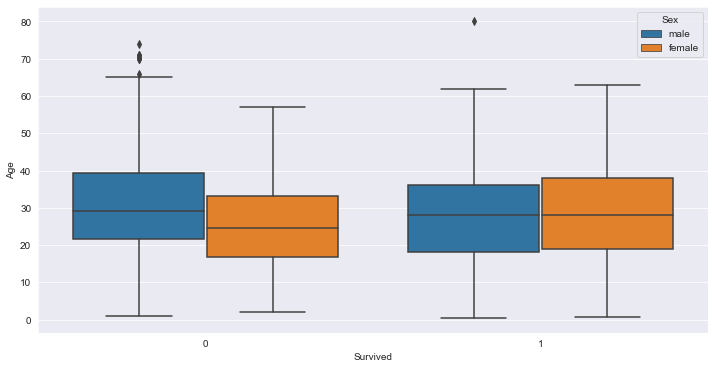

In [583]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Survived', y='Age', hue='Sex', data=train)

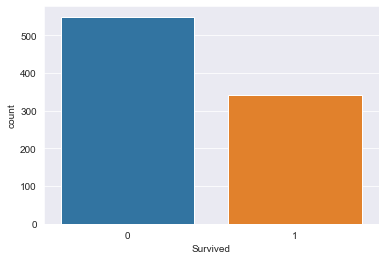

In [584]:
sns.countplot(x='Survived',data=train)

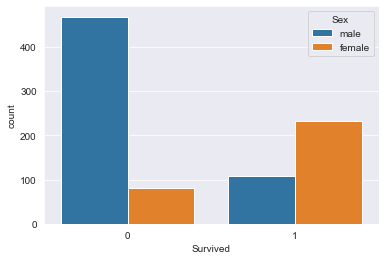

In [585]:
sns.countplot(x='Survived',data=train, hue='Sex')

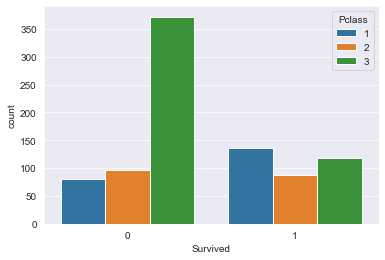

In [586]:
sns.countplot(x='Survived',data=train, hue='Pclass')

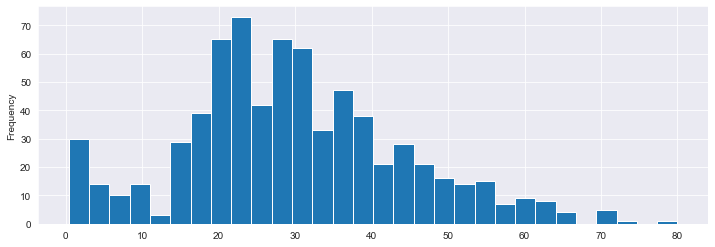

In [587]:
plt.figure(figsize=(12,4))
train['Age'].plot(kind='hist', bins=30)

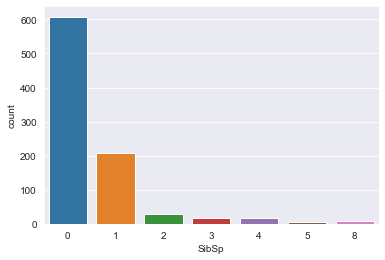

In [588]:
sns.countplot(x='SibSp', data=train)

In [589]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

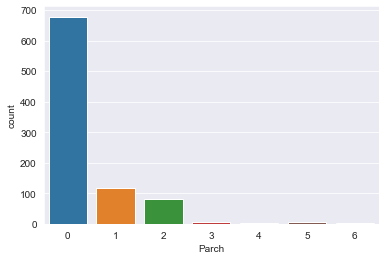

In [590]:
sns.countplot(x='Parch', data=train)

# Limpando os dados

In [591]:
full_data = [train, test]

In [592]:
data_cleaner = train.copy(deep=True)

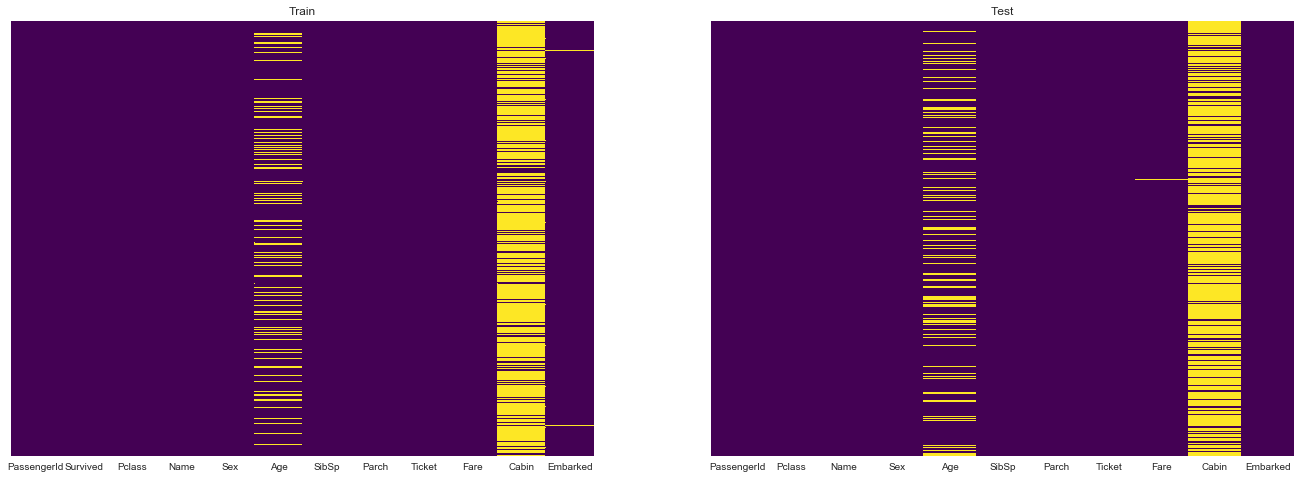

In [593]:
fig, ax = plt.subplots(1, 2, figsize=(23,8))
i = 0
for dataset in full_data:
    sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False, cmap='viridis', ax=ax[i])
    i += 1
ax[0].title.set_text('Train')
ax[1].title.set_text('Test')

Como há muitos valores faltantes da coluna 'Cabin' ela será eliminada

In [594]:
data_cleaner.drop('Cabin', axis=1, inplace=True)

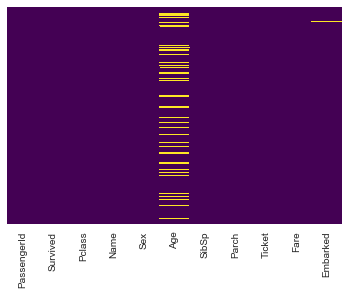

In [595]:
sns.heatmap(data_cleaner.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [596]:
data_cleaner.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Para preencher os valores faltantes da coluna 'Age' será feita pela media da idade por classe

In [597]:
data_cleaner.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [598]:
def fill_idade(cols):
    idade = cols[0]
    classe = cols[1]

    if pd.isnull(idade):
        if classe == 1:
            return 38
        elif classe == 2:
            return 30
        else:
            return 25
    else:
        return idade

In [599]:
data_cleaner[['Age','Pclass']].apply(fill_idade, axis=1)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Length: 891, dtype: float64

In [600]:
data_cleaner.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S


In [601]:
data_cleaner['Age'] = train[['Age','Pclass']].apply(fill_idade, axis=1)

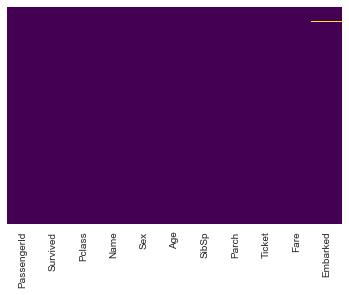

In [602]:
sns.heatmap(data_cleaner.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [603]:
data_cleaner.mode()['Embarked'][0]

'S'

In [604]:
data_cleaner['Embarked'].fillna(data_cleaner.mode()['Embarked'][0], inplace=True)

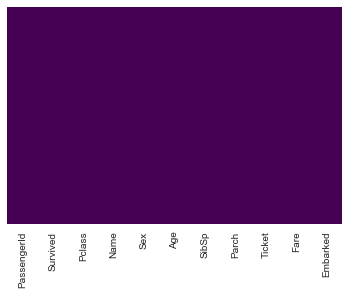

In [605]:
sns.heatmap(data_cleaner.isnull(), cbar=False, yticklabels=False, cmap='viridis')

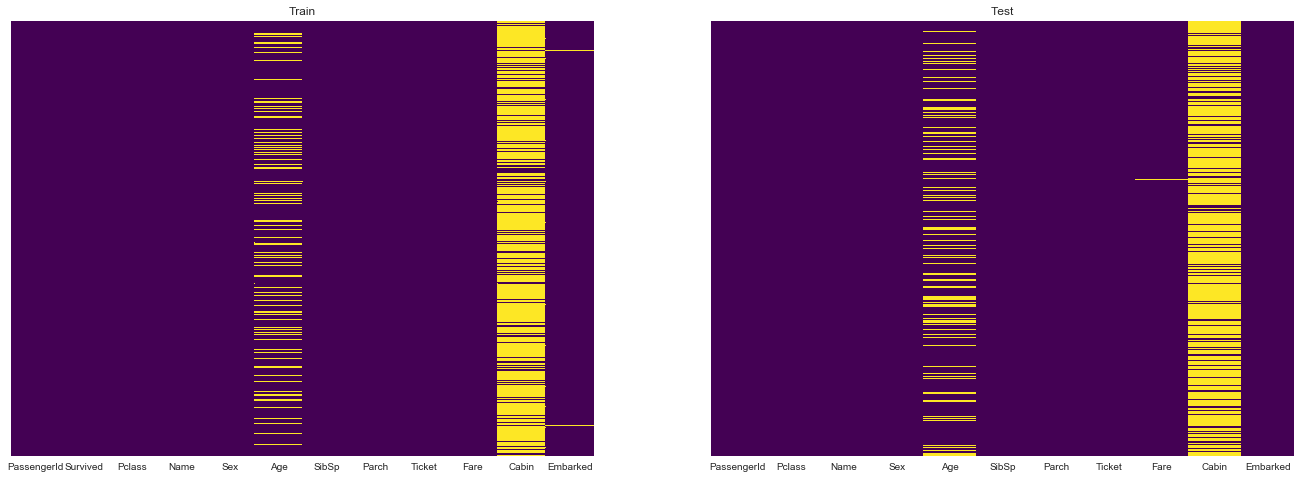

In [606]:
fig, ax = plt.subplots(1, 2, figsize=(23,8))
i = 0
for dataset in full_data:
    sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False, cmap='viridis', ax=ax[i])
    i += 1
ax[0].title.set_text('Train')
ax[1].title.set_text('Test')

In [607]:
for dataset in full_data:
    dataset['Age'] = dataset[['Age','Pclass']].apply(fill_idade, axis=1)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)
    
    delete_columns = ['Cabin', 'Ticket']
    dataset.drop(delete_columns, axis=1, inplace=True)

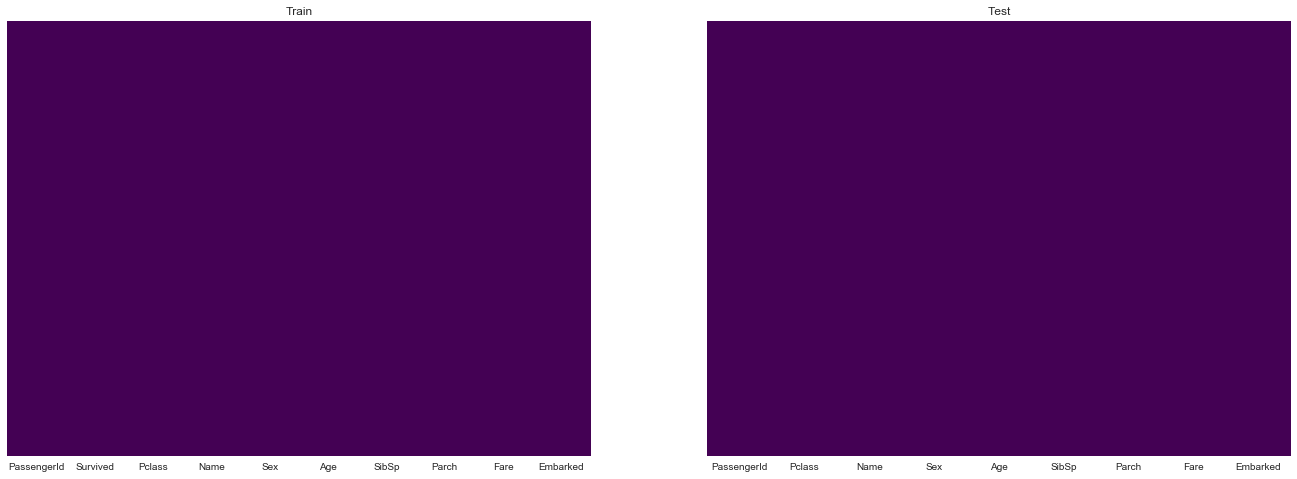

In [608]:
fig, ax = plt.subplots(1, 2, figsize=(23,8))
i = 0
for dataset in full_data:
    sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False, cmap='viridis', ax=ax[i])
    i += 1
ax[0].title.set_text('Train')
ax[1].title.set_text('Test')

In [609]:
train.drop('PassengerId', axis=1, inplace=True)

# Feature Engineering

In [610]:
for dataset in full_data:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   S

In [611]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embarked = pd.get_dummies(train['Embarked'], drop_first=True)
train.drop(['Sex', 'Embarked'], axis=1, inplace=True)
train = pd.concat([train, sex, embarked], axis=1)

In [612]:
sex = pd.get_dummies(test['Sex'], drop_first=True)
embarked = pd.get_dummies(test['Embarked'], drop_first=True)
test.drop(['Sex', 'Embarked'], axis=1, inplace=True)
test = pd.concat([test, sex, embarked], axis=1)

In [613]:
full_data = [train, test]

In [614]:
for dataset in full_data:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   male      891 non-null    uint8  
 8   Q         891 non-null    uint8  
 9   S         891 non-null    uint8  
dtypes: float64(2), int64(4), object(1), uint8(3)
memory usage: 51.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          418 non-null    float

In [615]:
data_Feat = train.copy(deep=True)

In [616]:
data_Feat.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1


In [617]:
import re

In [618]:
# Foi utilizado o https://regexr.com/ para chegar nesse regex
re.search(r'([A-Za-z]+)\.', 'Braund, Mr. Owen Harris')

<re.Match object; span=(8, 11), match='Mr.'>

In [619]:
re.search(r'([A-Za-z]+)\.', 'Braund, Owen Harris')

In [620]:
re.search(r'([A-Za-z]+)\.', 'Braund, Mr. Owen Harris').group(1)

'Mr'

In [621]:
if re.search(r'([A-Za-z]+)\.', 'Braund, Mr. Owen Harris') is not None:
    print('True')
else:
    print('False')

True


In [622]:
if re.search(r'([A-Za-z]+)\.', 'Braund, Owen Harris') is not None:
    print('True')
else:
    print('False')

False


In [623]:
def get_title (name):
    titulo = re.search('([A-Za-z]+)\.', name)
    if titulo is not None:
        return titulo.group(1)
    else:
        return ''

In [624]:
data_Feat['Title'] = data_Feat['Name'].apply(get_title)

In [626]:
data_Feat.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,male,Q,S,Title
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1,Mrs
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1,Mr


In [627]:
data_Feat['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Capt          1
Jonkheer      1
Ms            1
Mme           1
Don           1
Sir           1
Lady          1
Countess      1
Name: Title, dtype: int64

In [628]:
data_Feat['Title'] = data_Feat['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Jonkheer', 'Don', 'Sir', 'Lady', 'Countess'], 'Outros')

In [629]:
data_Feat['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Outros     23
Mlle        2
Ms          1
Mme         1
Name: Title, dtype: int64

In [630]:
data_Feat['Title'] = data_Feat['Title'].replace(['Mlle', 'Ms'], 'Miss')
data_Feat['Title'] = data_Feat['Title'].replace('Mme', 'Mr')

In [631]:
data_Feat['Title'].value_counts()

Mr        518
Miss      185
Mrs       125
Master     40
Outros     23
Name: Title, dtype: int64

In [632]:
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Rev', 'Col', 'Major',
                                                 'Capt', 'Jonkheer', 'Don','Dona', 'Sir', 'Lady', 'Countess'], 
                                                'Outros')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mr')

In [633]:
train['Title'].value_counts()

Mr        518
Miss      185
Mrs       125
Master     40
Outros     23
Name: Title, dtype: int64

In [634]:
test['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Outros      6
Name: Title, dtype: int64

In [636]:
for dataset in full_data:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   male      891 non-null    uint8  
 8   Q         891 non-null    uint8  
 9   S         891 non-null    uint8  
 10  Title     891 non-null    object 
dtypes: float64(2), int64(4), object(2), uint8(3)
memory usage: 58.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 


In [637]:
for dataset in full_data:
    dataset.drop('Name', axis=1, inplace=True)

In [638]:
for dataset in full_data:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    uint8  
 7   Q         891 non-null    uint8  
 8   S         891 non-null    uint8  
 9   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(1), uint8(3)
memory usage: 51.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64

In [639]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Title
0,0,3,22.0,1,0,7.2500,1,0,1,Mr
1,1,1,38.0,1,0,71.2833,0,0,0,Mrs
2,1,3,26.0,0,0,7.9250,0,0,1,Miss
3,1,1,35.0,1,0,53.1000,0,0,1,Mrs
4,0,3,35.0,0,0,8.0500,1,0,1,Mr


In [640]:
data_Feat = train.copy(deep=True)

In [641]:
data_Feat.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Title
0,0,3,22.0,1,0,7.2500,1,0,1,Mr
1,1,1,38.0,1,0,71.2833,0,0,0,Mrs
2,1,3,26.0,0,0,7.9250,0,0,1,Miss
3,1,1,35.0,1,0,53.1000,0,0,1,Mrs
4,0,3,35.0,0,0,8.0500,1,0,1,Mr


In [642]:
data_Feat['Age'].value_counts()

25.00    159
38.00     41
30.00     36
24.00     30
22.00     27
        ... 
36.50      1
66.00      1
55.50      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [644]:
data_Feat['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

Sera realizado uma reduzação de valores tanto da 'Age', quanto de 'Fare'
Para idade será utilizado a seguinte faixa etaria:
    Jovens - Indivíduos de até 15 anos;
    Adultos - Indivíduos com idade entre 16 até 64 anos;
    Idosos - Indivíduos de 65 anos em diante.

In [654]:
def idade (idade):
    if idade <= 15:
        return 'Young'
    elif 16 <= idade <= 64:
        return 'Adult'
    elif idade >= 65:
        return 'Elderly'

In [655]:
data_Feat['fe'] = data_Feat['Age'].apply(idade)

In [656]:
data_Feat[data_Feat['Age'] > 62]

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Title,fe
33,0,2,66.0,0,0,10.5000,1,0,1,Mr,Elderly
54,0,1,65.0,0,1,61.9792,1,0,0,Mr,Elderly
96,0,1,71.0,0,0,34.6542,1,0,0,Mr,Elderly
116,0,3,70.5,0,0,7.7500,1,1,0,Mr,Elderly
275,1,1,63.0,1,0,77.9583,0,0,1,Miss,Adult
280,0,3,65.0,0,0,7.7500,1,1,0,Mr,Elderly
438,0,1,64.0,1,4,263.0000,1,0,1,Mr,Adult
456,0,1,65.0,0,0,26.5500,1,0,1,Mr,Elderly
483,1,3,63.0,0,0,9.5875,0,0,1,Mrs,Adult
493,0,1,71.0,0,0,49.5042,1,0,0,Mr,Elderly


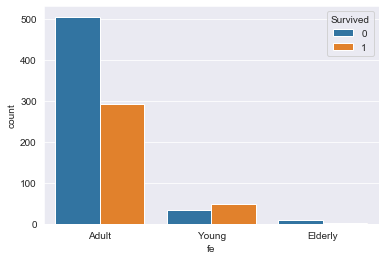

In [657]:
sns.countplot('fe', data=data_Feat, hue='Survived')

In [659]:
data_Feat['fe'].value_counts()

Adult      797
Young       83
Elderly     11
Name: fe, dtype: int64

In [660]:
for dataset in full_data:
    dataset['Age_group'] = dataset['Age'].apply(idade)

In [661]:
for dataset in full_data:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Age        891 non-null    float64
 3   SibSp      891 non-null    int64  
 4   Parch      891 non-null    int64  
 5   Fare       891 non-null    float64
 6   male       891 non-null    uint8  
 7   Q          891 non-null    uint8  
 8   S          891 non-null    uint8  
 9   Title      891 non-null    object 
 10  Age_group  891 non-null    object 
dtypes: float64(2), int64(4), object(2), uint8(3)
memory usage: 58.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-nul

In [662]:
Age_group = pd.get_dummies(train['Age_group'], drop_first=True)
train.drop(['Age', 'Age_group'], axis=1, inplace=True)
train = pd.concat([train, Age_group], axis=1)

In [663]:
Age_group = pd.get_dummies(test['Age_group'], drop_first=True)
test.drop(['Age', 'Age_group'], axis=1, inplace=True)
test = pd.concat([test, Age_group], axis=1)

In [664]:
full_data = [train, test]

In [665]:
for dataset in full_data:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   male      891 non-null    uint8  
 6   Q         891 non-null    uint8  
 7   S         891 non-null    uint8  
 8   Title     891 non-null    object 
 9   Elderly   891 non-null    uint8  
 10  Young     891 non-null    uint8  
dtypes: float64(1), int64(4), object(1), uint8(5)
memory usage: 46.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   SibSp        418 non-null    int64  


In [666]:
title = pd.get_dummies(train['Title'], drop_first=True)
train.drop(['Title'], axis=1, inplace=True)
train = pd.concat([train, title], axis=1)

In [667]:
title = pd.get_dummies(test['Title'], drop_first=True)
test.drop(['Title'], axis=1, inplace=True)
test = pd.concat([test, title], axis=1)

In [668]:
full_data = [train, test]
for dataset in full_data:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   male      891 non-null    uint8  
 6   Q         891 non-null    uint8  
 7   S         891 non-null    uint8  
 8   Elderly   891 non-null    uint8  
 9   Young     891 non-null    uint8  
 10  Miss      891 non-null    uint8  
 11  Mr        891 non-null    uint8  
 12  Mrs       891 non-null    uint8  
 13  Outros    891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(9)
memory usage: 42.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418

In [669]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,male,Q,S,Elderly,Young,Miss,Mr,Mrs,Outros
0,0,3,1,0,7.2500,1,0,1,0,0,0,1,0,0
1,1,1,1,0,71.2833,0,0,0,0,0,0,0,1,0
2,1,3,0,0,7.9250,0,0,1,0,0,1,0,0,0
3,1,1,1,0,53.1000,0,0,1,0,0,0,0,1,0
4,0,3,0,0,8.0500,1,0,1,0,0,0,1,0,0


In [672]:
train['CategoricalFare'] = pd.qcut(train['Fare'], 4, labels=['F1', 'F2', 'F3', 'F4'])

In [673]:
train['CategoricalFare'].head()

0    F1
1    F4
2    F2
3    F4
4    F2
Name: CategoricalFare, dtype: category
Categories (4, object): [F1 < F2 < F3 < F4]

In [684]:
train['CategoricalFare'].value_counts()

F2    224
F1    223
F4    222
F3    222
Name: CategoricalFare, dtype: int64

In [674]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Survived         891 non-null    int64   
 1   Pclass           891 non-null    int64   
 2   SibSp            891 non-null    int64   
 3   Parch            891 non-null    int64   
 4   Fare             891 non-null    float64 
 5   male             891 non-null    uint8   
 6   Q                891 non-null    uint8   
 7   S                891 non-null    uint8   
 8   Elderly          891 non-null    uint8   
 9   Young            891 non-null    uint8   
 10  Miss             891 non-null    uint8   
 11  Mr               891 non-null    uint8   
 12  Mrs              891 non-null    uint8   
 13  Outros           891 non-null    uint8   
 14  CategoricalFare  891 non-null    category
dtypes: category(1), float64(1), int64(4), uint8(9)
memory usage: 43.8 KB


In [675]:
ser, bins = pd.qcut(train['Fare'], 4, retbins=True, labels=['F1', 'F2', 'F3', 'F4'])

In [676]:
bins

array([  0.    ,   7.9104,  14.4542,  31.    , 512.3292])

In [686]:
pd.cut(test['Fare'], bins=bins, labels=['F1', 'F2', 'F3', 'F4'], include_lowest=True).value_counts()

F1    114
F4    108
F3     99
F2     97
Name: Fare, dtype: int64

In [687]:
test['CategoricalFare'] = pd.cut(test['Fare'], bins=bins, labels=['F1', 'F2', 'F3', 'F4'], include_lowest=True)

In [688]:
full_data = [train, test]
for dataset in full_data:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Survived         891 non-null    int64   
 1   Pclass           891 non-null    int64   
 2   SibSp            891 non-null    int64   
 3   Parch            891 non-null    int64   
 4   Fare             891 non-null    float64 
 5   male             891 non-null    uint8   
 6   Q                891 non-null    uint8   
 7   S                891 non-null    uint8   
 8   Elderly          891 non-null    uint8   
 9   Young            891 non-null    uint8   
 10  Miss             891 non-null    uint8   
 11  Mr               891 non-null    uint8   
 12  Mrs              891 non-null    uint8   
 13  Outros           891 non-null    uint8   
 14  CategoricalFare  891 non-null    category
dtypes: category(1), float64(1), int64(4), uint8(9)
memory usage: 43.8 KB
<class 'pandas.core.fr

In [690]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,male,Q,S,Elderly,Young,Miss,Mr,Mrs,Outros,CategoricalFare
0,0,3,1,0,7.2500,1,0,1,0,0,0,1,0,0,F1
1,1,1,1,0,71.2833,0,0,0,0,0,0,0,1,0,F4
2,1,3,0,0,7.9250,0,0,1,0,0,1,0,0,0,F2
3,1,1,1,0,53.1000,0,0,1,0,0,0,0,1,0,F4
4,0,3,0,0,8.0500,1,0,1,0,0,0,1,0,0,F2


In [691]:
fare = pd.get_dummies(train['CategoricalFare'], drop_first=True)
train.drop(['Fare'], axis=1, inplace=True)
train = pd.concat([train, fare], axis=1)

In [692]:
fare = pd.get_dummies(test['CategoricalFare'], drop_first=True)
test.drop(['Fare'], axis=1, inplace=True)
test = pd.concat([test, fare], axis=1)

In [693]:
full_data = [train, test]
for dataset in full_data:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Survived         891 non-null    int64   
 1   Pclass           891 non-null    int64   
 2   SibSp            891 non-null    int64   
 3   Parch            891 non-null    int64   
 4   male             891 non-null    uint8   
 5   Q                891 non-null    uint8   
 6   S                891 non-null    uint8   
 7   Elderly          891 non-null    uint8   
 8   Young            891 non-null    uint8   
 9   Miss             891 non-null    uint8   
 10  Mr               891 non-null    uint8   
 11  Mrs              891 non-null    uint8   
 12  Outros           891 non-null    uint8   
 13  CategoricalFare  891 non-null    category
 14  F2               891 non-null    uint8   
 15  F3               891 non-null    uint8   
 16  F4               891 non-null    uint8   
dt

In [694]:
test.drop(['CategoricalFare'], axis=1, inplace=True)

In [695]:
train.drop(['CategoricalFare'], axis=1, inplace=True)

In [696]:
full_data = [train, test]
for dataset in full_data:
    dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   SibSp     891 non-null    int64
 3   Parch     891 non-null    int64
 4   male      891 non-null    uint8
 5   Q         891 non-null    uint8
 6   S         891 non-null    uint8
 7   Elderly   891 non-null    uint8
 8   Young     891 non-null    uint8
 9   Miss      891 non-null    uint8
 10  Mr        891 non-null    uint8
 11  Mrs       891 non-null    uint8
 12  Outros    891 non-null    uint8
 13  F2        891 non-null    uint8
 14  F3        891 non-null    uint8
 15  F4        891 non-null    uint8
dtypes: int64(4), uint8(12)
memory usage: 38.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  

In [700]:
train.head()

,Survived,Pclass,SibSp,Parch,male,Q,S,Elderly,Young,Miss,Mr,Mrs,Outros,F2,F3,F4
0,0,3,1,0,1,0,1,0,0,0,1,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,3,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1
4,0,3,0,0,1,0,1,0,0,0,1,0,0,1,0,0


In [702]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [703]:
train.head()

,Survived,Pclass,SibSp,Parch,male,Q,S,Elderly,Young,Miss,Mr,Mrs,Outros,F2,F3,F4,FamilySize,IsAlone
0,0,3,1,0,1,0,1,0,0,0,1,0,0,0,0,0,2,0
1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0
2,1,3,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1
3,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,2,0
4,0,3,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1


In [704]:
test.head()

,PassengerId,Pclass,SibSp,Parch,male,Q,S,Elderly,Young,Miss,Mr,Mrs,Outros,F2,F3,F4,FamilySize,IsAlone
0,892,3,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1
1,893,3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0
2,894,2,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1
3,895,3,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1
4,896,3,1,1,0,0,1,0,0,0,0,1,0,1,0,0,3,0


In [705]:
test.drop(['SibSp'], axis=1, inplace=True)
train.drop(['SibSp'], axis=1, inplace=True)

In [706]:
train.head()

,Survived,Pclass,Parch,male,Q,S,Elderly,Young,Miss,Mr,Mrs,Outros,F2,F3,F4,FamilySize,IsAlone
0,0,3,0,1,0,1,0,0,0,1,0,0,0,0,0,2,0
1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0
2,1,3,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1
3,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,2,0
4,0,3,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1


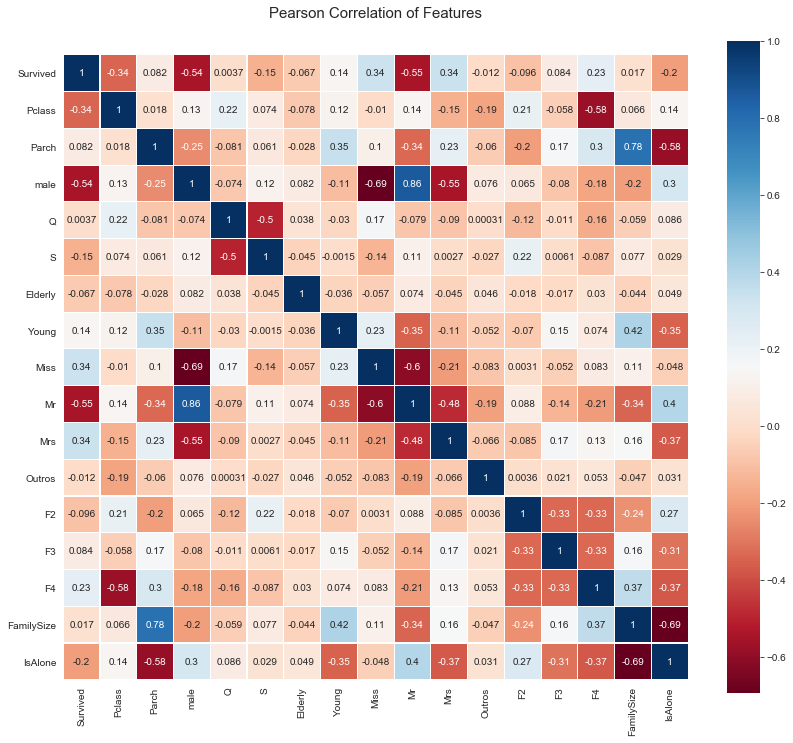

In [707]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [708]:
train.to_csv('train_limpo_2.csv')
test.to_csv('test_limpo_2.csv')